<a href="https://colab.research.google.com/github/mmulready2/Selfie_Segmentation_mvm/blob/main/SelfiSegmentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Segmentation Lab

We previously learned how to do segmentation based on pixel color using kmeans (see [Segmentation Intro notebook](https://github.com/taylan-sen/CIS490b_computer_vision/blob/main/SegmentationIntro.ipynb)). Recall that we provided kmeans a number of "clusters", it then found an "ideal" set of color "means", after which each pixel in the image was assigned to the cluster which was the closest color. While kmeans is simple and can be widely applied, we saw its limitations in that some independent pixels or small groups of pixels formed a group, which didn't always track an object; in other words, kmeans didn't always produce contiguous regions as segments.  

In this lab we use a more advanced "intelligent" segmentation technique in which the segmentor has knowledge of what a typical human body looks like.

### Questions
1. Give a brief description of each of the following python modules:
  * **cvzone** - open-source python library
  * **mediapipe** - on-device machine learning algorithms


2. Complete the code below using your own photo of you, and then answer:
  * How well did it segment your image?

It did not segment my image very well.
  * What portions of your body did it incorrectly cut off or what parts of the source picture did it paste onto the background that it should not have?

It included all of me but the background around me is kind of messy, understandable with my hair. Then there is a piece of background on the left that is coming out of no where, it should not have segmented that.




In [8]:
from IPython.display import display, Javascript
from google.colab.output import eval_js
from base64 import b64decode

def take_photo(filename='photo.jpg', quality=0.8):
  js = Javascript('''
    async function takePhoto(quality) {
      const div = document.createElement('div');
      const capture = document.createElement('button');
      capture.textContent = 'Capture';
      div.appendChild(capture);

      const video = document.createElement('video');
      video.style.display = 'block';
      const stream = await navigator.mediaDevices.getUserMedia({video: true});

      document.body.appendChild(div);
      div.appendChild(video);
      video.srcObject = stream;
      await video.play();

      // Resize the output to fit the video element.
      google.colab.output.setIframeHeight(document.documentElement.scrollHeight, true);

      // Wait for Capture to be clicked.
      await new Promise((resolve) => capture.onclick = resolve);

      const canvas = document.createElement('canvas');
      canvas.width = video.videoWidth;
      canvas.height = video.videoHeight;
      canvas.getContext('2d').drawImage(video, 0, 0);
      stream.getVideoTracks()[0].stop();
      div.remove();
      return canvas.toDataURL('image/jpeg', quality);
    }
    ''')
  display(js)
  data = eval_js('takePhoto({})'.format(quality))
  binary = b64decode(data.split(',')[1])
  with open(filename, 'wb') as f:
    f.write(binary)
  return filename

<IPython.core.display.Javascript object>

Saved to photo.jpg


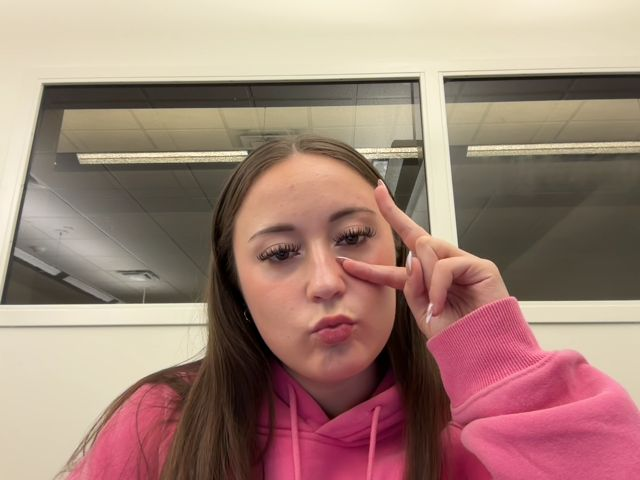

In [9]:
from IPython.display import Image
try:
  filename = take_photo()
  print('Saved to {}'.format(filename))

  # Show the image which was just taken.
  display(Image(filename))
except Exception as err:
  # Errors will be thrown if the user does not have a webcam or if they do not
  # grant the page permission to access it.
  print(str(err))

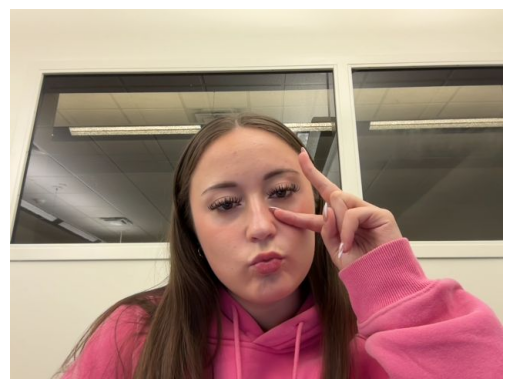

In [2]:
import cv2
import matplotlib.pyplot as plt

img = cv2.imread('photo.jpg')
img2 = img.copy()
img2 = cv2.cvtColor(img2, cv2.COLOR_BGR2RGB)

plt.axis('off')
plt.imshow(img2)

In [6]:
!wget 'https://www.thewowstyle.com/wp-content/uploads/2015/01/trip-to-niagara-falls.jpg'


--2025-10-22 14:53:42--  https://www.thewowstyle.com/wp-content/uploads/2015/01/trip-to-niagara-falls.jpg
Resolving www.thewowstyle.com (www.thewowstyle.com)... 77.37.115.232, 77.37.48.178, 2a02:4780:38:62c1:a615:c639:f3:3f77, ...
Connecting to www.thewowstyle.com (www.thewowstyle.com)|77.37.115.232|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 201585 (197K) [image/jpeg]
Saving to: ‘trip-to-niagara-falls.jpg.2’

trip-to-niagara-fal 100%[===================>] 196.86K  1.02MB/s    in 0.2s    

2025-10-22 14:53:45 (1.02 MB/s) - ‘trip-to-niagara-falls.jpg.2’ saved [201585/201585]



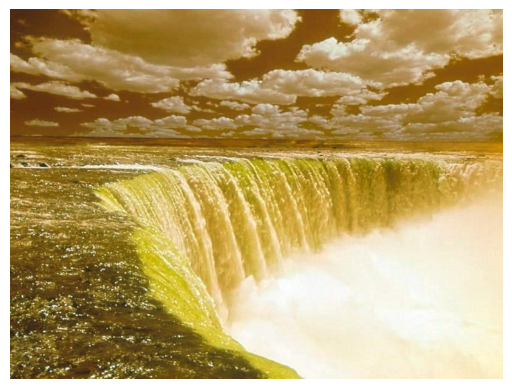

In [4]:
background = cv2.imread('trip-to-niagara-falls.jpg')
plt.axis('off')
plt.imshow(background)

In [13]:
!pip install cvzone
!pip install mediapipe

  Preparing metadata (setup.py) ... done
  Created wheel for cvzone: filename=cvzone-1.6.1-py3-none-any.whl size=26298 sha256=97b9851468c51f2b6472e7b5f12e716c178734e8ac88ba159ee6bcd834fbe6b5
  Stored in directory: /root/.cache/pip/wheels/5d/21/e8/3147ae88d44e27f06e0175d337a7673c70fb957202cbbe2034
Successfully built cvzone
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.0/61.0 kB 1.9 MB/s eta 0:00:00
INFO: pip is looking at multiple versions of opencv-contrib-python to determine which version is compatible with other requirements. This could take a while.
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 35.6/35.6 MB 54.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.0/18.0 MB 89.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 294.9/294.9 kB 20.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 69.1/69.1 MB 9.8 MB/s eta 0:00:00
  Attempting uninstall: protobuf
    Found existing installation: protobuf 5.29.5
    Uninstalling protobuf-5.29.5:
     

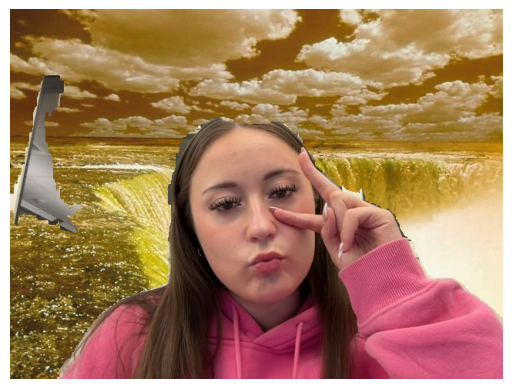

In [7]:
import cvzone
from cvzone.SelfiSegmentationModule import SelfiSegmentation

background = cv2.resize(background, (img2.shape[1], img2.shape[0]))

segmentor = SelfiSegmentation()
human = segmentor.removeBG(img2, background)
plt.imshow(human)
plt.axis('off')
plt.show()
